In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("SET_processed_latest_version.csv")

In [4]:
df.head()

,GRYD_ETO_ID,INTERVIEW_DATE_FB,SET_admin_num,AGE_1_FB,SEX_1,GRYD_Zone_num,group_position,PAGE_3,S1,S2,...,CIW_CLIENT_ID,CIW_INTERVIEW_DATE,CIW_COMPLETED_DATE,CIW1,CIW2,CIW3,CIW4,CIW5,CIW6_COMMENTS,END_OF_SET_QUESTIONS
0,BVCB-0-144-1,"2,01,2015",3,20.0,2,22,3,,0.0,0.0,...,BVCB-0-144-1,"2,01,2015","9,09,1999",1,4,2,1,1,Blank,
1,BVCB-0-174-1,"3,25,2015",2,21.0,1,22,3,,0.0,0.0,...,BVCB-0-174-1,"3,25,2015","4,02,2015",1,4,3,2,2,Blank,
2,Southeast 3-10-24-1,"7,21,2015",1,NaN,2,21,2,,1.0,1.0,...,Southeast 3-10-24-1,,,,,,,,no page 17 completed,
3,Southeast 3-10-18-1,"7,23,2015",1,25.0,1,21,2,,1.0,1.0,...,Southeast 3-10-18-1,,,,,,,,no page 17 completed,
4,Southeast 3-10-17-1,"7,23,2015",1,24.0,2,21,2,,1.0,1.0,...,Southeast 3-10-17-1,,,,,,,,no page 17 completed,


In [5]:
for i in range(df.shape[1]):
    df.iloc[:,i]= df.iloc[:,i].replace([555, 777,888,999,'555','777','888','999' ], np.nan)
    #replace useless numbers with nan

Get textual data

In [6]:
text=df.loc[:,['S6b_Other_Activities','S11a_Comments','A1_Description','A2_Description','A3_Description','O1_other_group_name','Group_name_part1','PUSH_1','PULL_1']]

In [7]:
text["text_all"] = text.apply(lambda x: ','.join(x.dropna()), axis=1)
#add a new column to store all test for each person

In [8]:
text.head()

,S6b_Other_Activities,S11a_Comments,A1_Description,A2_Description,A3_Description,O1_other_group_name,Group_name_part1,PUSH_1,PULL_1,text_all
0,"Working out, CBT, boxing","School. Poor grades, car accident, not enough ...",School,NaN,School,Other group,Group,Somebody got out of jail that brought a lot of...,School. work. moving,"Working out, CBT, boxing,School. Poor grades, ..."
1,Basketball,Mother died,Basketball,NaN,NaN,No name,Money Gang,NaN,NaN,"Basketball,Mother died,Basketball,No name,Mone..."
2,Extra activities with children,Favor cousin was murder and never found his ki...,"Church, job and school",Church choir and praise team,NaN,Church group,No group,NaN,NaN,"Extra activities with children,Favor cousin wa..."
3,Actor/dance,Best friend brother was murder [sic] by 16 and...,"Church, school and job",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Actor/dance,Best friend brother was murder [si..."
4,Singing,Best fried brother was murder [sic] by 18yr boy,"Church, job, and school",Church choir and praise team,NaN,No name,No name,NaN,NaN,"Singing,Best fried brother was murder [sic] by..."


## frequency analysis of all textual questions
if need to analyze specifc questions, just change the below cell to "contents=text[col].values"

In [9]:
contents=text['text_all'].values

remove punctuations 

In [10]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
contents[0]

'Working out, CBT, boxing,School. Poor grades, car accident, not enough work hours,School,School,Other group,Group,Somebody got out of jail that brought a lot of drama,School. work. moving'

In [12]:
# since sometimes a comma is not followed by a space, I replace all commas with space
for i in range (contents.shape[0]):
    contents[i]=contents[i].replace(",", " ")
contents

array(['Working out  CBT  boxing School. Poor grades  car accident  not enough work hours School School Other group Group Somebody got out of jail that brought a lot of drama School. work. moving',
       'Basketball Mother died Basketball No name Money Gang',
       'Extra activities with children Favor cousin was murder and never found his killer :( Church  job and school Church choir and praise team Church group No group',
       ..., 'Community service Friends No group',
       'cheerleading Friends cheerleading Friends Cheerleading No group',
       'one on one Police keep raiding my house Community service Helper Helper Homies Going to jail No'],
      dtype=object)

In [13]:
all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]

In [14]:
all_contents = [i.lower() for i in all_contents]

In [20]:
all_one_contents=" ".join(all_contents)
all_one_contents

'working out  cbt  boxing school poor grades  car accident  not enough work hours school school other group group somebody got out of jail that brought a lot of drama school work moving basketball mother died basketball no name money gang extra activities with children favor cousin was murder and never found his killer  church  job and school church choir and praise team church group no group actordance best friend brother was murder sic by 16 and 13  church  school and job church choir and praise team no name no name singing best fried brother was murder sic by 18yr boy church  job  and school church choir and praise team no name no name singing in church praise team choir best friend brother was murder sic by 22yr man  all church  job and school church choir and praise team no name no name community events aztecs aztecs ms no no no name no group my mom going to jail no other group homies my mom went to jail i want to get my high school diploma or ged looking for a job  studying  read

In [16]:
contents_tokens = all_one_contents.split()

remove trash words

In [17]:
from nltk.corpus import stopwords

In [18]:
clean_tokens = list()
sw = stopwords.words('english')
other_trash = ["name", "voala", 'america', 'get', 'yes', 'dont','got','getting','going','go','group','went','voala','time','want','away','voa','two']
trash_tokens = sw + other_trash
for token in contents_tokens:
    if token not in trash_tokens:
        clean_tokens.append(token)

In [19]:
clean_tokens

['working',
 'cbt',
 'boxing',
 'school',
 'poor',
 'grades',
 'car',
 'accident',
 'enough',
 'work',
 'hours',
 'school',
 'school',
 'somebody',
 'jail',
 'brought',
 'lot',
 'drama',
 'school',
 'work',
 'moving',
 'basketball',
 'mother',
 'died',
 'basketball',
 'money',
 'gang',
 'extra',
 'activities',
 'children',
 'favor',
 'cousin',
 'murder',
 'never',
 'found',
 'killer',
 'church',
 'job',
 'school',
 'church',
 'choir',
 'praise',
 'team',
 'church',
 'actordance',
 'best',
 'friend',
 'brother',
 'murder',
 'sic',
 '16',
 '13',
 'church',
 'school',
 'job',
 'church',
 'choir',
 'praise',
 'team',
 'singing',
 'best',
 'fried',
 'brother',
 'murder',
 'sic',
 '18yr',
 'boy',
 'church',
 'job',
 'school',
 'church',
 'choir',
 'praise',
 'team',
 'singing',
 'church',
 'praise',
 'team',
 'choir',
 'best',
 'friend',
 'brother',
 'murder',
 'sic',
 '22yr',
 'man',
 'church',
 'job',
 'school',
 'church',
 'choir',
 'praise',
 'team',
 'community',
 'events',
 'aztecs',
 

 frequency plot on words appearance

In [19]:
freq = nltk.FreqDist(clean_tokens)
freq

FreqDist({'friends': 1534, 'school': 1227, 'gryd': 867, 'homies': 556, 'church': 353, 'job': 349, 'nothing': 275, 'volunteers': 270, 'client': 245, 'football': 232, ...})

In [20]:
from collections import Counter

In [21]:
plot_dict = dict(Counter(freq).most_common(30))
plot_dict

{'friends': 1534,
 'school': 1227,
 'gryd': 867,
 'homies': 556,
 'church': 353,
 'job': 349,
 'nothing': 275,
 'volunteers': 270,
 'client': 245,
 'football': 232,
 'work': 230,
 'friend': 227,
 'family': 209,
 'program': 209,
 'jail': 196,
 'basketball': 189,
 'shot': 169,
 'life': 143,
 'killed': 122,
 'team': 118,
 'community': 118,
 'working': 104,
 'volunteer': 100,
 'workshops': 85,
 'brother': 82,
 'mom': 78,
 'soccer': 74,
 'hygiene': 74,
 'father': 70,
 'new': 69}

In [22]:
from matplotlib.pyplot import figure

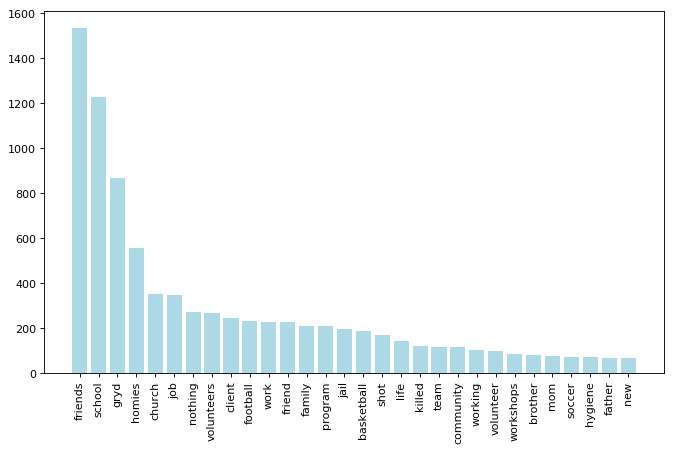

In [23]:
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list(plot_dict.keys()), list(plot_dict.values()), color='lightblue')
plt.xticks(rotation=90)
plt.show()

text classification with kmeans

In [24]:
content_list = list()
for i in all_contents:
    temp = i.split()
    content_list.append(" ".join([j for j in temp if j not in trash_tokens]))

In [25]:
len(content_list)

2765

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(content_list)
X.shape

(2765, 2540)

In [28]:
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(2765, 2)

In [29]:
distortions = []
K = range(5, 15)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

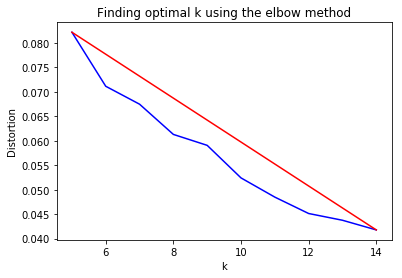

In [30]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [31]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=25)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [32]:
len(y_pred)

2765

In [33]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2765 samples in 0.261s...
[t-SNE] Computed neighbors for 2765 samples in 36.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2765
[t-SNE] Computed conditional probabilities for sample 2000 / 2765
[t-SNE] Computed conditional probabilities for sample 2765 / 2765
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.753006
[t-SNE] KL divergence after 1000 iterations: 1.427414


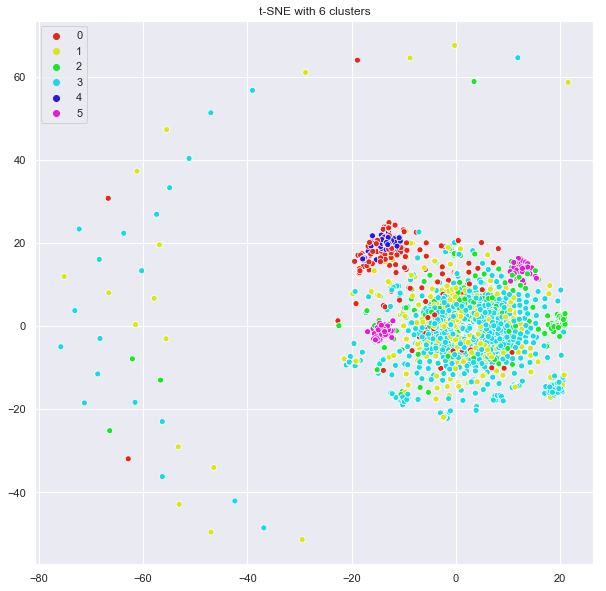

In [34]:
import seaborn as sns
X_embedded_all = X_embedded
y_all = y_pred
sns.set(rc={'figure.figsize':(10,10)})
palette = sns.hls_palette(k, l=.5, s=.8)

sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with {} clusters'.format(k))
plt.show()